Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Darina Petrova | 12230205 | 05.02.2024, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 7 &ndash; Tricks of the Trade</h2>

<b>Authors:</b> Schlüter, Rumetshofer, Schörgenhumer<br>
<b>Date:</b> 22-01-2024

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u7_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u7_utils.py</code> need to be installed.

In [1]:
# Required packages and the u7_utils file
import u7_utils as u7
from pathlib import Path
import torch

/home/darina/Desktop/std/sem1/hands-on-AI-I/u7/u7_utils.py:45: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


<h2>Exercise 1</h2>

<div class="alert alert-warning">
    <b>Exercise 1.1. [5 Points]</b>
    <ul>
        <li>In this notebook, you will be working with the provided datatset <code>resources/burgers_and_buritos</code>.</li>
        <li>Specify the path and download the images of this dataset.</li>
        <li>Load the dataset, reserving 20% for validation and enabling data augmentation.</li>
    </ul>
</div>

In [2]:
# your code goes here
dataset_path = Path('resources/burgers_and_burritos')
u7.download_all_images(dataset_path)
u7.set_seed(100)
dataset = u7.load_image_dataset(
    dataset_path,
    valid_size=0.2,  
    augment=True  
)

ignored 3 'burritos' images due to previous download failure
ignored 318 'burritos' images because they already exist


ignored 2 'burgers' images due to previous download failure
ignored 308 'burgers' images because they already exist


<div class="alert alert-warning">
    <b>Exercise 1.2. [5 Points]</b>
    <ul>
        <li>Plot 8 example images in 2 rows.</li>
    </ul>
</div>

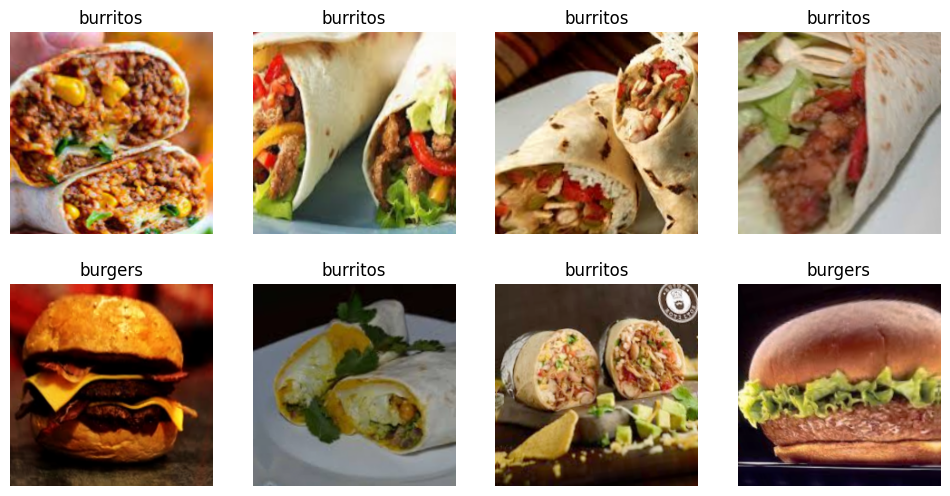

In [3]:
# your code goes here
u7.set_seed(100)
dataset.show_batch(
    max_n=8, nrows=2,  
    unique=False
)

<h2>Exercise 2</h2>

<div class="alert alert-warning">
    <b>Exercise 2.1. [5 Points]</b>
    <ul>
        <li>Using <code>u7.create_cnn()</code>, create a <b>pretrained</b> CNN with 18 layers and the number of classes set according to your dataset (the other settings do not matter).</li>
        <li>Store the model in a variable called <code>model</code>.</li>
    </ul>
</div>

In [4]:
# your code goes here
u7.set_seed(100)
model = u7.create_cnn(
    num_classes=dataset.c,
    num_layers=18,
    pretrained=True   # whether to use pretrained weights
)

<div class="alert alert-warning">
    <b>Important:</b> Plot the weights of the first layer (already done, only need to execute the cell).
</div>

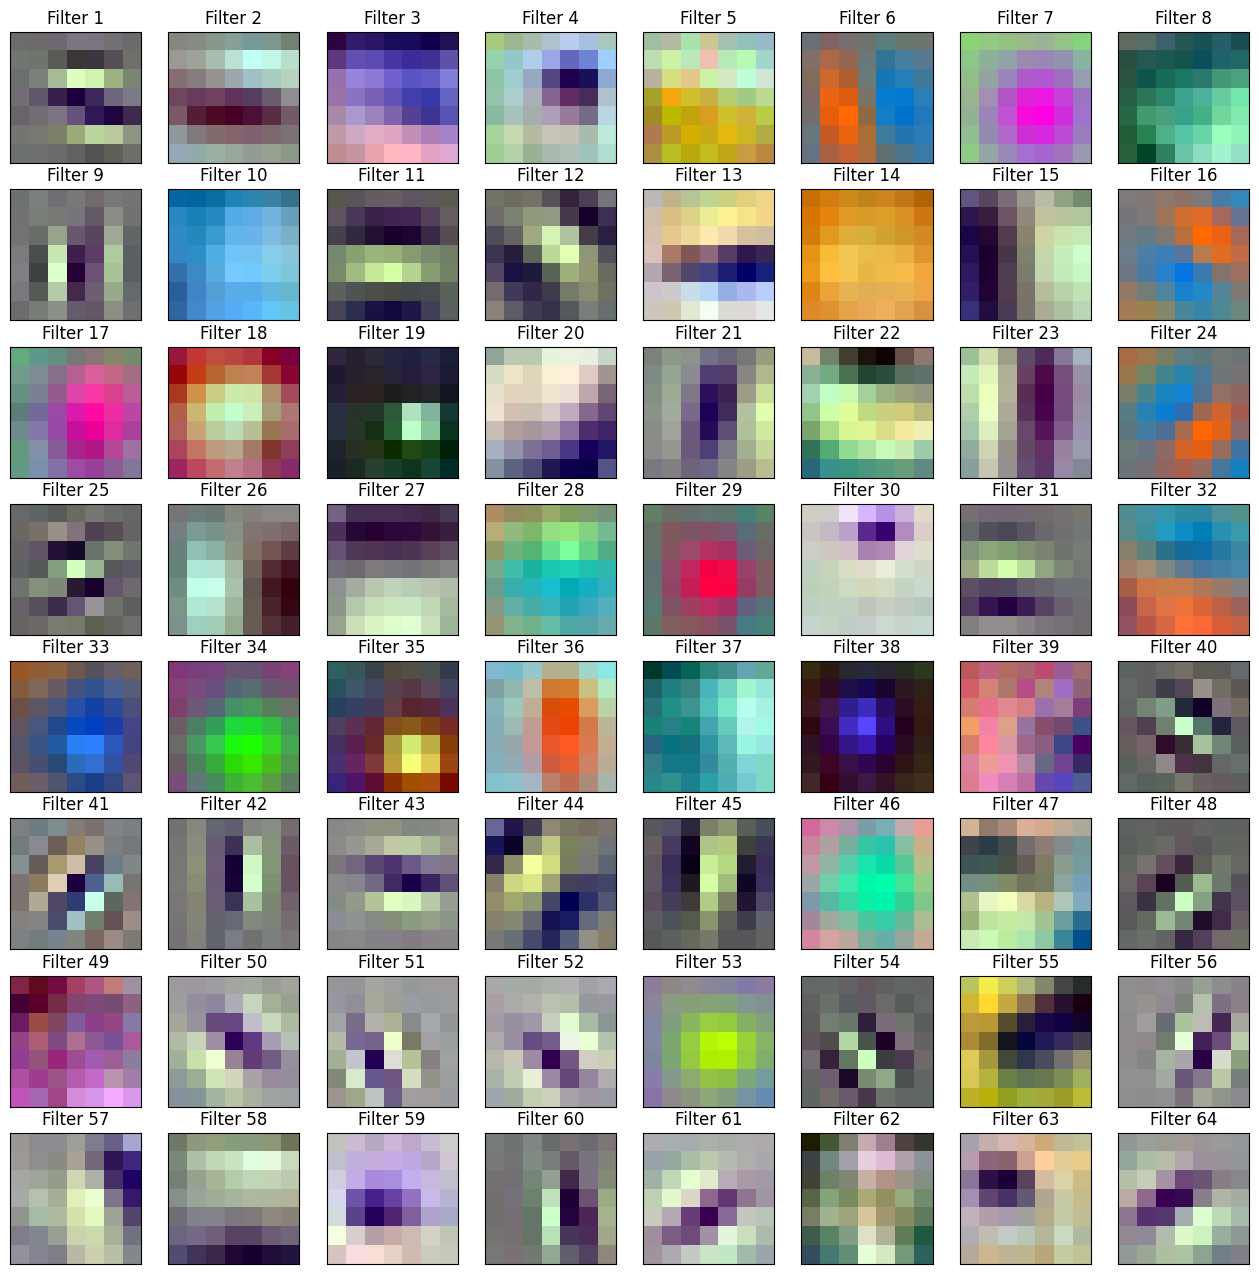

In [5]:
weights = u7.visualize_cnn_filters(model, ncols=8, image_size=2)

<h2>Exercise 3</h2>

Using the dataset that you loaded in Exercise 1, perform the following tasks:

<div class="alert alert-warning">
    <b>Exercise 3.1. [5 Points]</b>
    <ul>
        <li>Create a CNN with 18 layers, no dropout, no batch normalization, no residuals, and no pretraining, using <code>u7.create_cnn()</code>.</li>
        <li><b>Important:</b> Set the seed to 100 before calling <code>u7.create_cnn()</code>.</li>
    </ul>
</div>

In [6]:
# your code goes here
u7.set_seed(100)
model1 = u7.create_cnn(
    num_classes=dataset.c,
    num_layers=18,      # try larger models: 18, 34, 50, 101 or 152 (these are already predefined for you)
    batchnorm=False,   # whether to use batch normalization
    dropout=0,         # try 0.5 for 50% dropout or 0.25 for 25% dropout
    residuals=False,   # whether to use residual connections
    pretrained=False   # whether to use pretrained weights
)

<div class="alert alert-warning">
    <b>Exercise 3.2. [5 Points]</b>
    <ul>
        <li>Plot the weights of the first layer and store them in a variable called <code>weights_before_training</code>.</li>
    </ul>
</div>

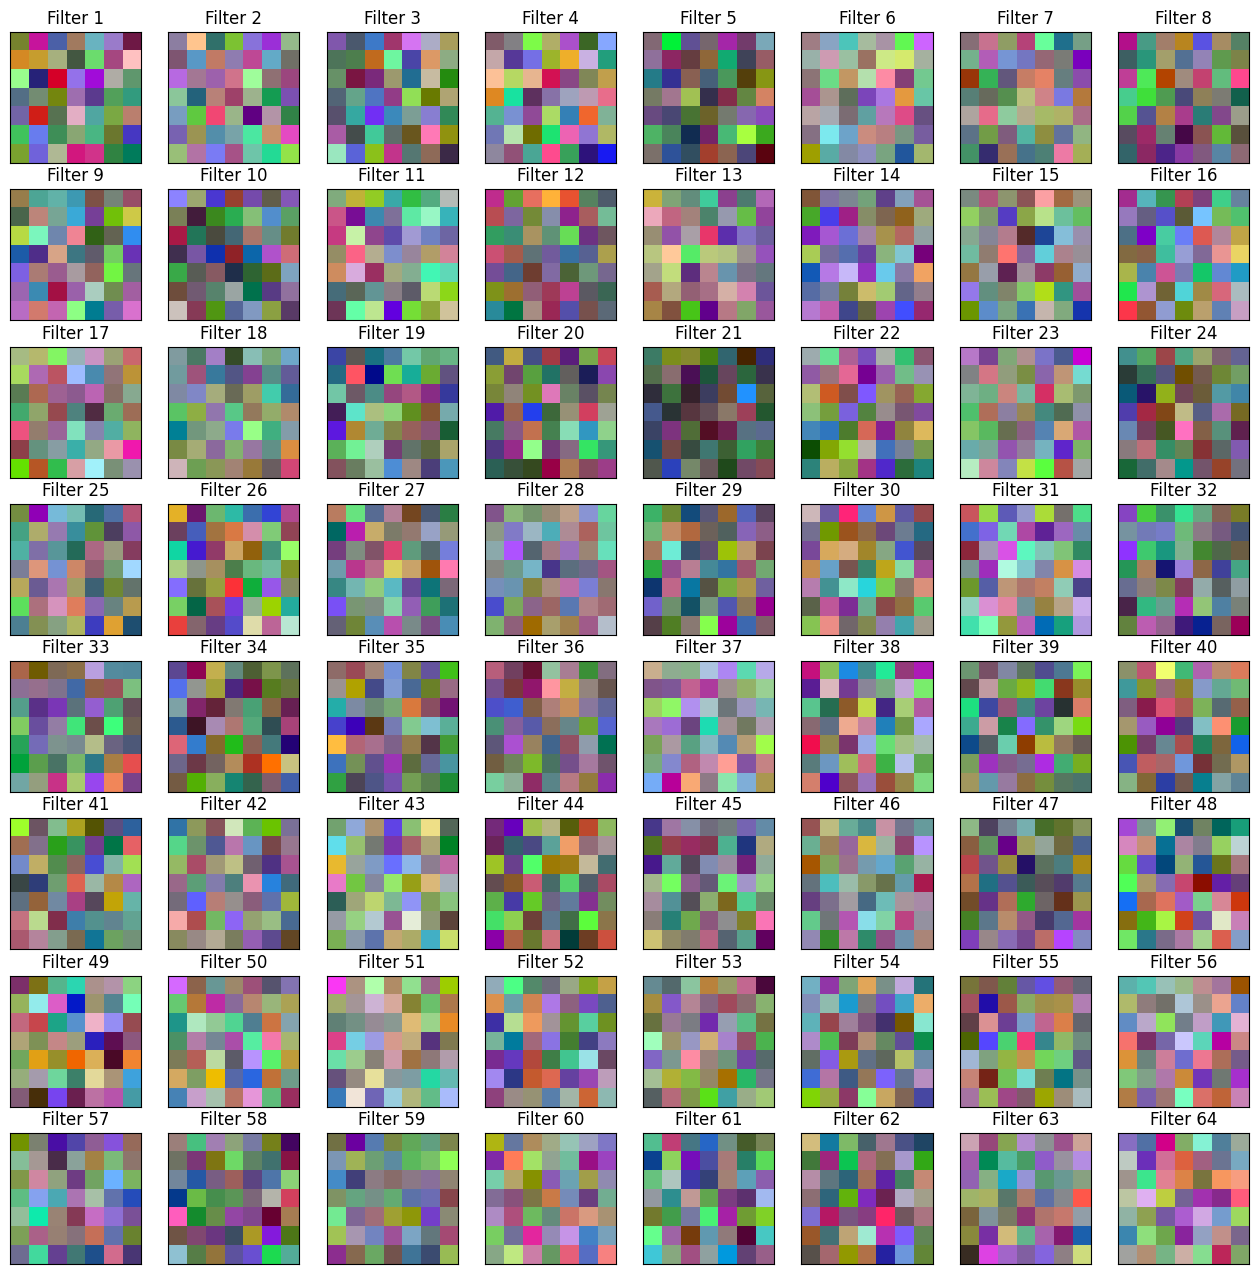

In [7]:
# your code goes here
weights_before_training = u7.visualize_cnn_filters(model1, ncols=8, image_size=2)

<div class="alert alert-warning">
    <b>Exercise 3.3. [5 Points]</b>
    <ul>
        <li>Train the model for 5 iterations/epochs, with a constant learning rate of 0.005 (no learning rate schedule), momentum of 0.9, and without plotting curves, using <code>u7.run_gradient_descent()</code>.</li>
        <li>Hint: You may omit the validation set to speed up the computation, as it is not needed.</li>
    </ul>
</div>

In [8]:
# your code goes here
loss = torch.nn.functional.cross_entropy
u7.set_seed(100)
u7.run_gradient_descent(
    model=model1,
    loss=loss,
    training_set=dataset.train,
    iterations=5,         # number of epochs
    learning_rate=0.005,  # base learning rate
    momentum=0.9,         # base momentum
    lr_schedule=None,     # try "linear", "onecycle", "steps"
    plot_curves=False
);

  0%|          | 0/501 [00:00<?, ?it/s]

Epoch  1 finished with training loss: 0.692174
Epoch  2 finished with training loss: 0.679738
Epoch  3 finished with training loss: 0.667247
Epoch  4 finished with training loss: 0.635846
Epoch  5 finished with training loss: 0.629083


<div class="alert alert-warning">
    <b>Exercise 3.4. [5 Points]</b>
    <ul>
        <li>Plot the weights of the first layer again and store them in a variable called <code>weights_after_training</code>.</li>
    </ul>
</div>

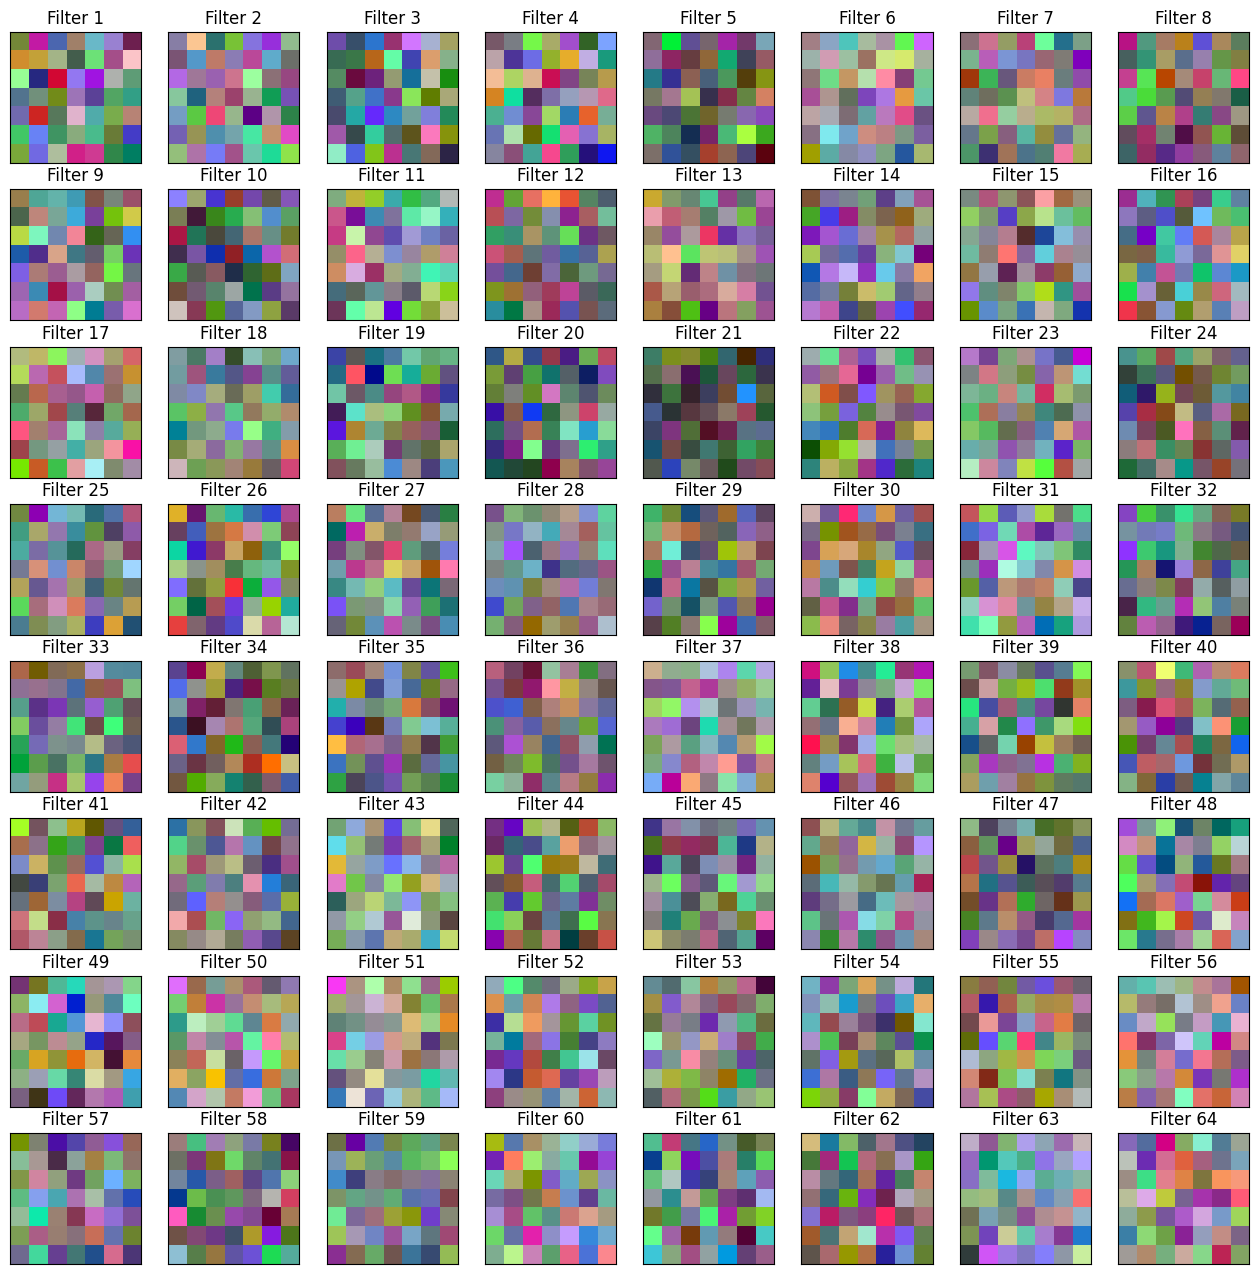

In [9]:
# your code goes here
weights_after_training = u7.visualize_cnn_filters(model1, ncols=8, image_size=2)

<div class="alert alert-warning">
    <b>Exercise 3.5. [5 Points]</b>
    <ul>
        <li>Compare the filters plotted before and after training. Do you see any difference? Did the filters change visibly during training?</li>
    </ul>
</div>

I do not see any visible change in any of the filters.

<div class="alert alert-warning">
    <b>Important:</b> Print the absolute difference of weights before and after training (already done, only need to execute the cell). This might help you in answering the above question.
</div>

In [10]:
(weights_before_training - weights_after_training).abs().sum().item()

16.67456817626953

<h2>Exercise 4</h2>

Similar to before, perform the following tasks:

<div class="alert alert-warning">
    <b>Exercise 4.1. [5 Points]</b>
    <ul>
        <li>Create a CNN with 18 layers, no dropout, <b>with</b> batch normalization, <b>with</b> residuals, and no pretraining, using <code>u7.create_cnn()</code>.</li>
        <li><b>Important:</b> Set the seed to 100 before calling <code>u7.create_cnn()</code>.</li>
    </ul>
</div>

In [11]:
# your code goes here
u7.set_seed(100)
model2 = u7.create_cnn(
    num_classes=dataset.c,
    num_layers=18,      # try larger models: 18, 34, 50, 101 or 152 (these are already predefined for you)
    batchnorm=True,   # whether to use batch normalization
    dropout=0,         # try 0.5 for 50% dropout or 0.25 for 25% dropout
    residuals=True,   # whether to use residual connections
    pretrained=False   # whether to use pretrained weights
)

<div class="alert alert-warning">
    <b>Exercise 4.2. [5 Points]</b>
    <ul>
        <li>Plot the weights of the first layer and store them in a variable called <code>weights_before_training</code>.</li>
    </ul>
</div>

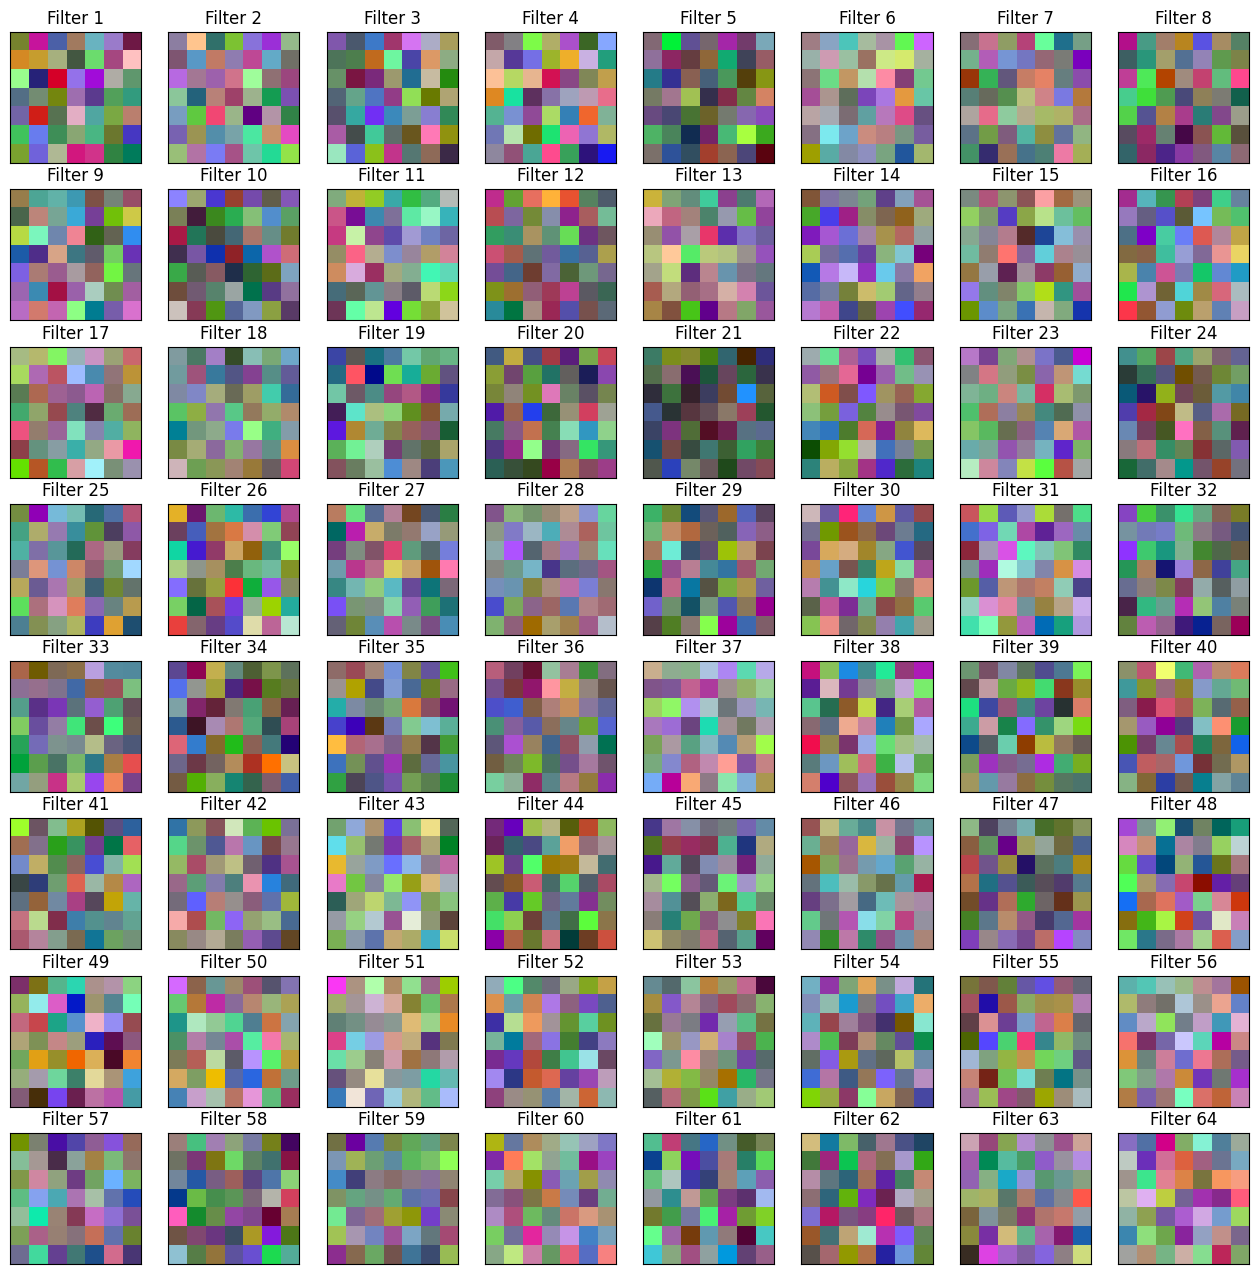

In [12]:
# your code goes here
weights_before_training = u7.visualize_cnn_filters(model2, ncols=8, image_size=2)

<div class="alert alert-warning">
    <b>Exercise 4.3. [5 Points]</b>
    <ul>
        <li>Train the model for 5 iterations, with a constant learning rate of 0.005 (no learning rate schedule), momentum of 0.9, and without plotting curves, using <code>u7.run_gradient_descent()</code>.</li>
        <li>Hint: You may omit the validation set to speed up the computation, as it is not needed.</li>
    </ul>
</div>

In [13]:
# your code goes here
u7.set_seed(100)
u7.run_gradient_descent(
    model=model2,
    loss=loss,
    training_set=dataset.train,
    iterations=5,         # number of epochs
    learning_rate=0.005,  # base learning rate
    momentum=0.9,         # base momentum
    lr_schedule=None,     # try "linear", "onecycle", "steps"
    plot_curves=False
);

  0%|          | 0/501 [00:00<?, ?it/s]

Epoch  1 finished with training loss: 0.660394
Epoch  2 finished with training loss: 0.653153
Epoch  3 finished with training loss: 0.582072
Epoch  4 finished with training loss: 0.500340
Epoch  5 finished with training loss: 0.548068


<div class="alert alert-warning">
    <b>Exercise 4.4. [5 Points]</b>
    <ul>
        <li>Plot the weights of the first layer again and store them in a variable called <code>weights_after_training</code>.</li>
    </ul>
</div>

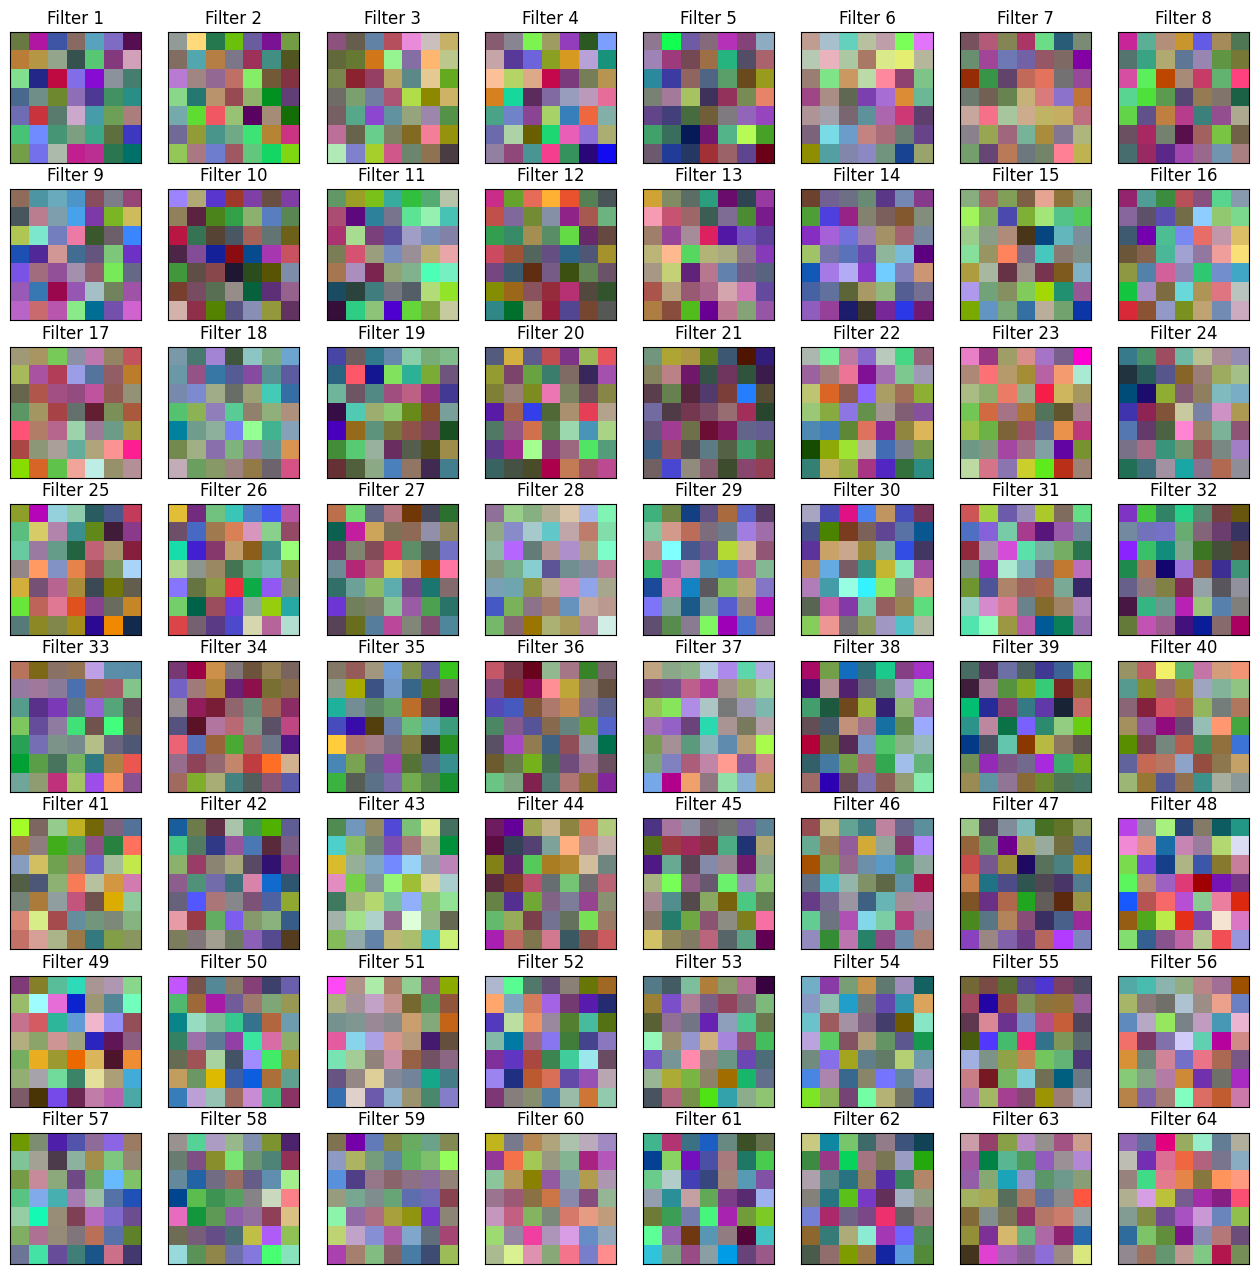

In [14]:
# your code goes here
weights_after_training = u7.visualize_cnn_filters(model2, ncols=8, image_size=2)

<div class="alert alert-warning">
    <b>Exercise 4.5. [5 Points]</b>
    <ul>
        <li>Compare the filters plotted before and after training. Do you see any difference? Did the filters change visibly during training?</li>
    </ul>
</div>

A big portion the colors have now slightly changed, along with their contrast and intensity (for example darker/brighter patches), showing that the network changed updated the filter weights.

<div class="alert alert-warning">
    <b>Important:</b> Print the absolute difference of weights before and after training (already done, only need to execute the cell). This might help you in answering the above question.
</div>

In [15]:
(weights_before_training - weights_after_training).abs().sum().item()

78.6535415649414

<h2>Exercise 5</h2>

Magic vs. you!

<div class="alert alert-warning">
    <b>Exercise 5.1. [5 Points]</b>
    <ul>
        <li>Using <code>u7.perform_magic()</code>, calculate the error rate on the dataset specified in the beginning of the notebook (use the same path).</li>
        <li>Use a validation size of 20% and let it run for 2 iterations/epochs. All other settings should use the default values.</li>
        <li><b>Important:</b> Set the seed to 100 before calling <code>u7.perform_magic()</code>.</li>
    </ul>
</div>

In [16]:
u7.set_seed(100)
result = u7.perform_magic(dataset_path, valid_size=0.2, iterations=2)

epoch,train_loss,valid_loss,error_rate,time
0,0.587925,0.066372,0.016000,00:46
1,0.311545,0.103808,0.032000,00:46


<div class="alert alert-warning">
    <b>Exercise 5.2. [30 Points]</b>
    <ul>
        <li>Now it's your time! Can you get the same or a lower error rate on the validation set than the magic from above?</li>
        <li>Use the same validation size of 20% when manually loading the dataset with <code>u7.load_image_dataset()</code>. All other settings are completely up to you!</li>
        <li><b>Important:</b> Set the seed to 100 before all following calls:
            <ul>
                <li><code>u7.load_image_dataset()</code></li>
                <li><code>u7.create_cnn()</code> (if you want to use this utility function, you can also set up your own architecture, but make sure to set the seed before that, too)</li>
                <li><code>u7.run_gradient_descent()</code></li>
            </ul>
        </li>
        <li>Note: In the unlikely case that <code>u7.perform_magic()</code> from above has an error rate of 0, try to get as close as possible to this result (within about 5% error rate).</li>
    </ul>
</div>

  0%|          | 0/501 [00:00<?, ?it/s]

Epoch  1 finished with training loss: 0.646387 and validation loss: 0.416003
Epoch  2 finished with training loss: 0.260514 and validation loss: 0.691514
Epoch  3 finished with training loss: 0.146476 and validation loss: 0.226054
Epoch  4 finished with training loss: 0.193785 and validation loss: 0.106581
Epoch  5 finished with training loss: 0.090644 and validation loss: 0.102454
Epoch  6 finished with training loss: 0.077803 and validation loss: 0.234329
Epoch  7 finished with training loss: 0.077350 and validation loss: 0.123151
Epoch  8 finished with training loss: 0.083692 and validation loss: 0.116478


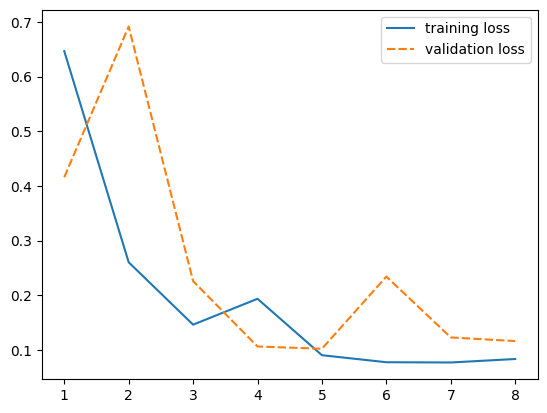

Validation set error rate: 0.03999999904632568
I cannot get it smaller than that, but it's very close to the error rate we got from 5.1 (= 0.032). I have tried various combinations and the computing time is enormous for me to try any more, I hope this is good enough.


In [26]:
u7.set_seed(100)
dataset = u7.load_image_dataset(
    dataset_path,
    valid_size=0.2,
    # batch_size = 16,
    augment=True  
)

u7.set_seed(100)
model3 = u7.create_cnn(
    num_classes=dataset.c,
    num_layers=152,      # try larger models: 18, 34, 50, 101 or 152 (these are already predefined for you)
    batchnorm=True,   # whether to use batch normalization
    dropout=0.5,         # try 0.5 for 50% dropout or 0.25 for 25% dropout
    residuals=True,   # whether to use residual connections
    pretrained=True   # whether to use pretrained weights
)

u7.set_seed(100)
u7.run_gradient_descent(
    model=model3,
    loss=loss,
    training_set=dataset.train,
    valid_set=dataset.valid,
    iterations=8,         # number of epochs
    learning_rate=0.01,  # base learning rate
    momentum=0.9,         # base momentum
    lr_schedule='onecycle',     # try "linear", "onecycle", "steps"
    plot_curves=True
);

x = u7.evaluate_model(model3, dataset.valid, loss=loss, error_rate=u7.multiclass_error_rate)
print(f"Validation set error rate: {x['error_rate']}")
print('I cannot get it smaller than that, but it\'s very close to the error rate we got from 5.1 (= 0.032). I have tried various combinations and the computing time is enormous for me to try any more, I hope this is good enough.')
